In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import json
import sys
import os
import matplotlib
#matplotlib.use('Agg') 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import pdb
import h5py
import importlib
import pickle

# Add root folder to sys path
sys.path.append("../")

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (12.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

sns.set()

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Import own modules
# Need to use importlib since module starts with a numerical value.

from load_expert_traj import Expert, ExpertHDF5

plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots

/home/arjun/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def plot_data_n_colors_policy(data, grid_size, policy,
                              bounds=[-100, -0.5, 0.5, 1000],
                              color_map=['black', 'grey', 'red'],
                              save_path=''):
    
    cmap = matplotlib.colors.ListedColormap(color_map)
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(data, cmap=cmap, norm=norm, extent=[0, grid_size, 0, grid_size],
              )

    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels([])
    ax.grid(True)
    ax.autoscale(enable=False)

    for a, m in [(0, '>'), (1, 'v'), (2, '<'), (3, '^')]:
        if len(np.where(policy == a)) > 0:
            x, y = np.where(policy == a)
            # Why this weird math?
            # Original grid map has origin at top left (usual for images).
            # imshow (above) has a property `extent` which allows us to define the origin
            # location when rendering. But ax.scatter (below) doesn't have such an API,
            # it rather defines origin at  bottom left corner hence to convert to top left
            # we do the below math.
            ax.scatter(x=y + 0.5, y=grid_size - 1 - x + 0.5, c='r',
                       s=120, marker=m, edgecolors='none')
    if len(save_path) > 0:
        fig.savefig(save_path)
        
    fig.show()
    
def plot_trajectory(traj_data, grid_size,
                    pred_traj_data=None,
                    bounds=[-100, -.5, .5, 100],
                    color_map=['black', 'grey', 'red'],
                    save_path='', figsize=(6,6)):
    cmap = matplotlib.colors.ListedColormap(color_map)
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(np.ones((grid_size, grid_size)), 
              cmap=cmap,
              norm=norm,
              extent=[0, grid_size, 0, grid_size],
              interpolation='none', aspect='equal'
              )

    #ax.get_xaxis().set_ticklabels([])
    #ax.get_yaxis().set_ticklabels([])
    ax.set_xticks(range(grid_size))
    ax.set_yticks(range(grid_size))
    ax.grid(True)    

    for i in range(traj_data.shape[0]):
        x, y = traj_data[i, 0], traj_data[i, 1]
        marker = '.' if i > 0 else '*'
        ax.scatter(x=y + 0.5, y=grid_size - 1 - x + 0.5, c='r',
                       s=120, marker=marker, edgecolors='none')
        
        if pred_traj_data is not None:
            pred_x, pred_y = pred_traj_data[i, 0], pred_traj_data[i, 1]
            ax.scatter(x=pred_y + 0.75, y=grid_size - 1 - pred_x + 0.75, c='g',
                       s=120, marker=marker, edgecolors='none')

    if len(save_path) > 0:
        fig.savefig(save_path)
    
    fig.tight_layout()
    fig.show()


In [3]:
def softmax(x):
    new_x = x - np.max(x,axis=1)[:, np.newaxis]
    denom = np.sum(np.exp(new_x), axis = 1)[:, np.newaxis]
    return np.exp(new_x)/denom
    

/home/arjun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


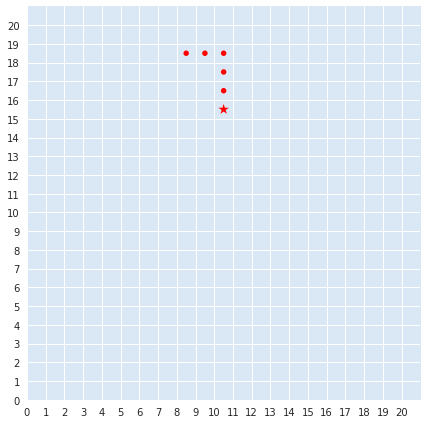

In [4]:
def plot_expert_trajectories_from_h5(expert_h5_path, num_traj_to_plot=10):
    expert = ExpertHDF5(expert_h5_path, 2)
    # Push data into memory
    expert.push()
    
    expert_data = expert.sample(num_traj_to_plot)
    
    for i in range(num_traj_to_plot):
        ep_states = expert_data.state[i]
        ep_actions = expert_data.action[i]
        # get (x, y) states for trajectories
        ep_positions = ep_states[:, :2]
        # Plot trajectory
        plot_trajectory(ep_positions,
                        21,
                        color_map=sns.color_palette("Blues_r"),
                        figsize=(6, 6))


plot_expert_trajectories_from_h5('../h5_trajs/LR_trajs/traj_1',
                                 num_traj_to_plot=1,
                                 )

True goal: 2
Pred latent variable:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
True goal: 1
Pred latent variable:
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


/home/arjun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


True goal: 0
Pred latent variable:
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
True goal: 7
Pred latent variable:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
True goal: 6
Pred latent variable:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
True goal: 3
Pred latent variable:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
True goal: 2
Pred latent variable:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
True goal: 4
Pred latent variable:
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
True goal: 1
Pred latent variable:
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
True goal: 4
Pred latent variable:
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 

/home/arjun/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


True goal: 1
Pred latent variable:
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
True goal: 3
Pred latent variable:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
True goal: 3
Pred latent variable:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
True goal: 7
Pred latent variable:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
True goal: 0
Pred latent variable:
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
True goal: 1
Pred latent variable:
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
True goal: 4
Pred latent variable:
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
True goal: 7
Pred latent variable:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 

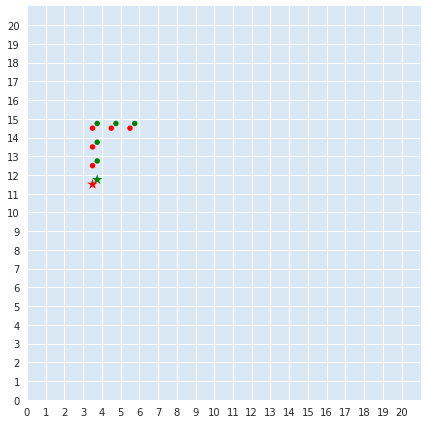

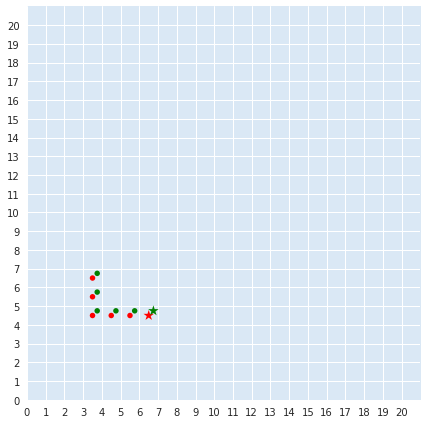

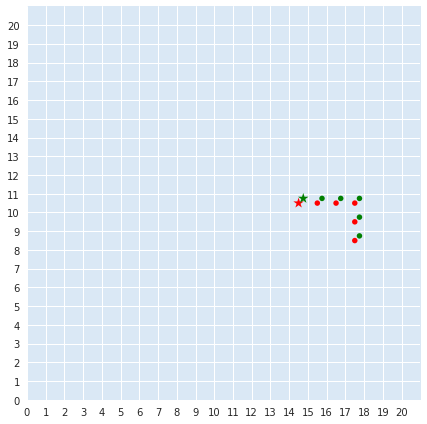

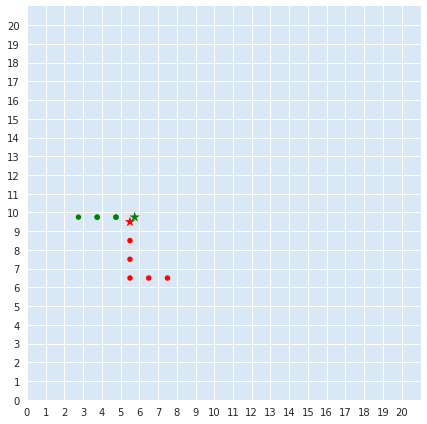

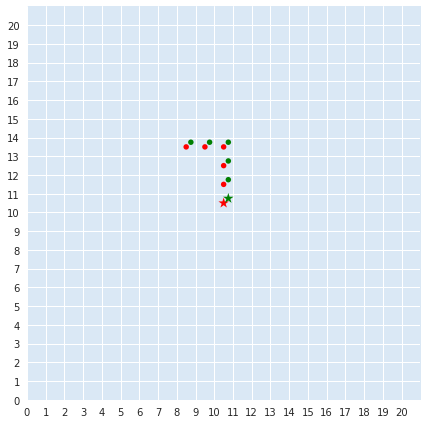

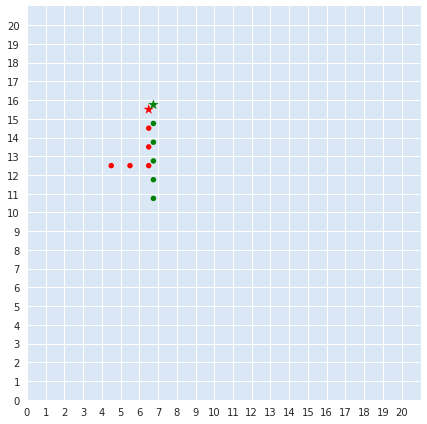

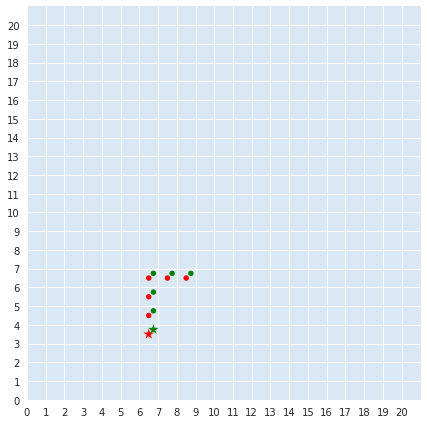

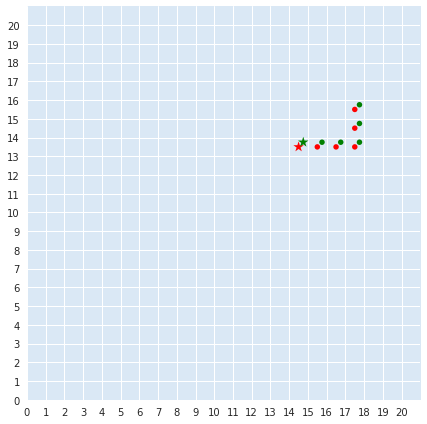

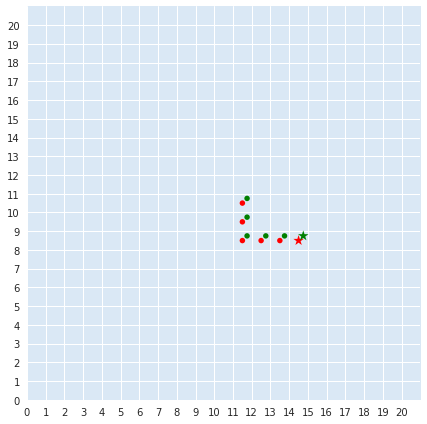

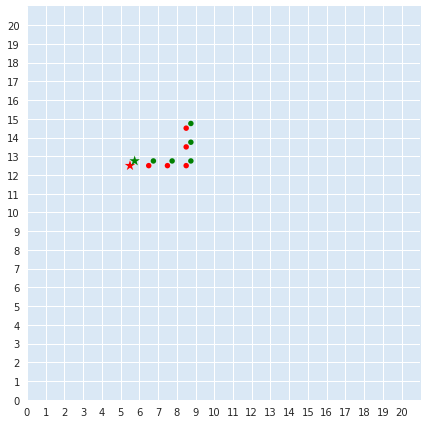

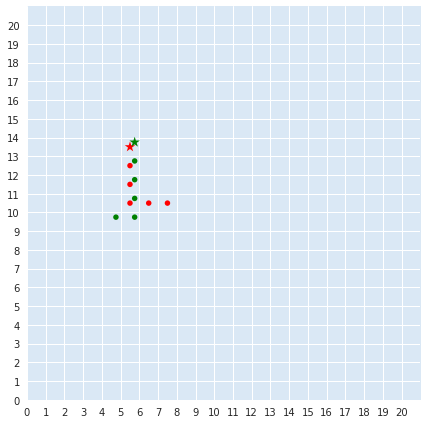

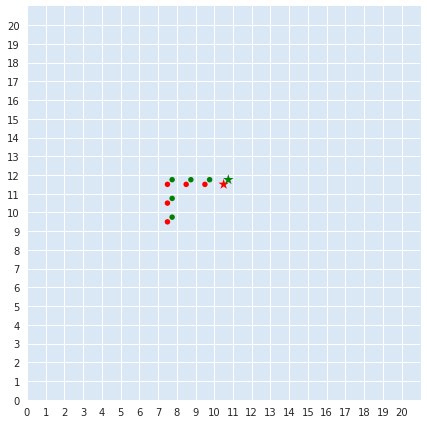

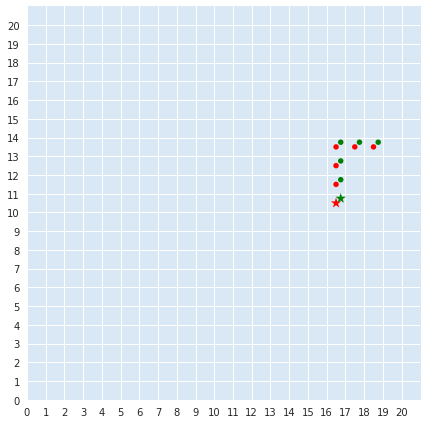

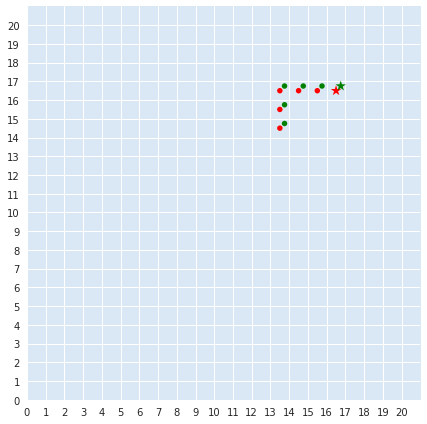

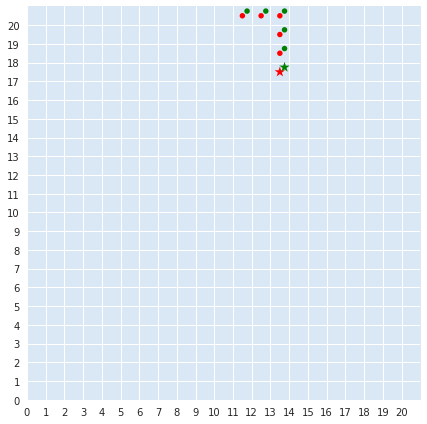

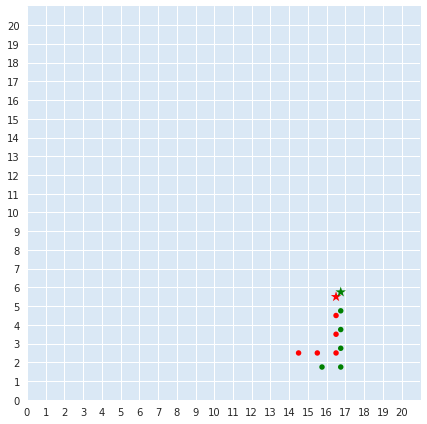

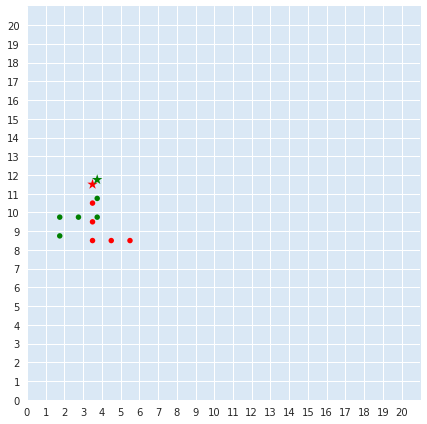

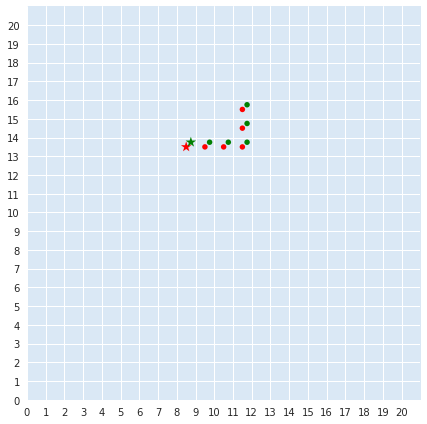

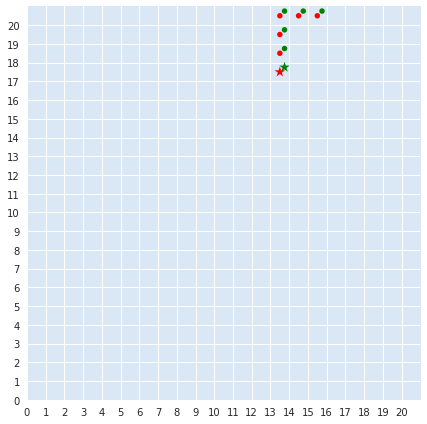

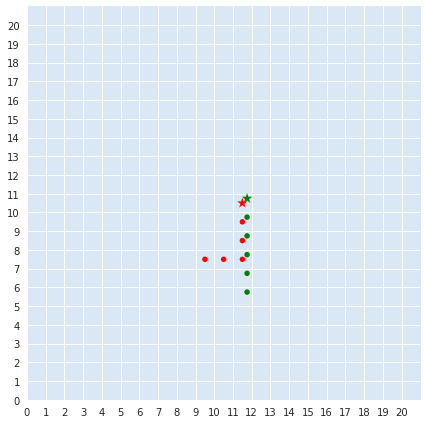

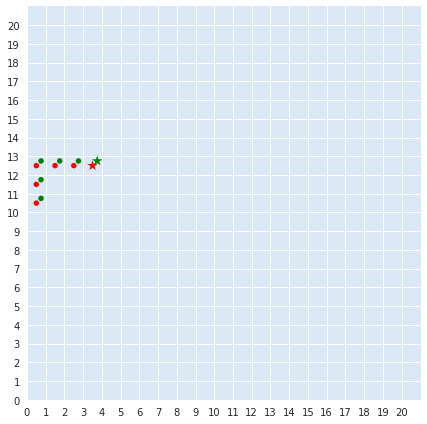

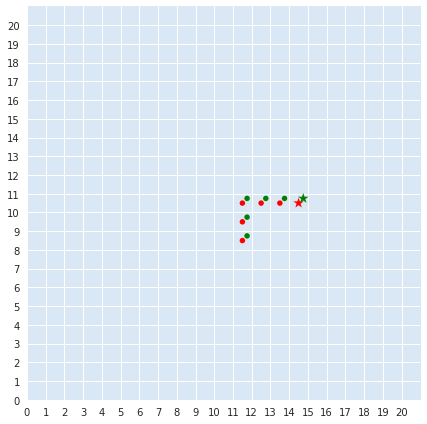

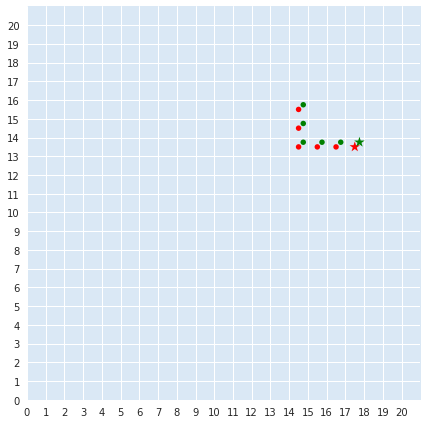

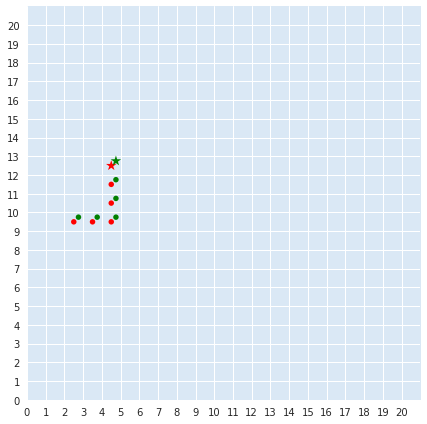

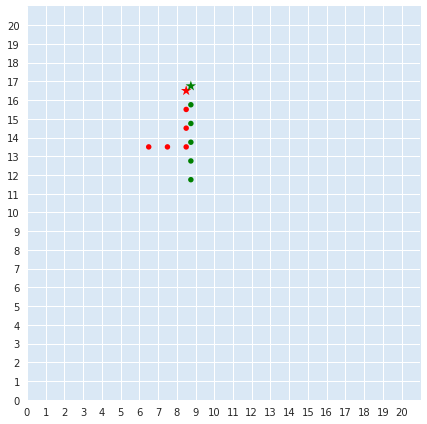

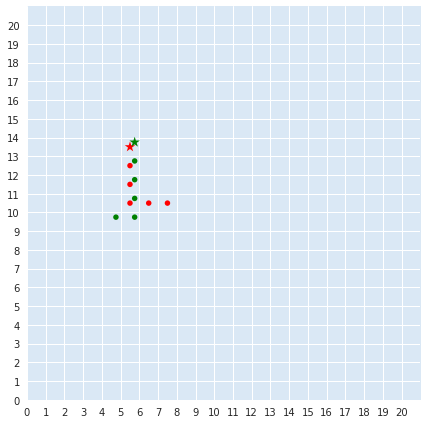

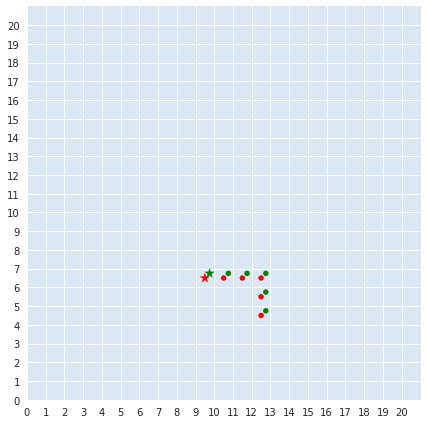

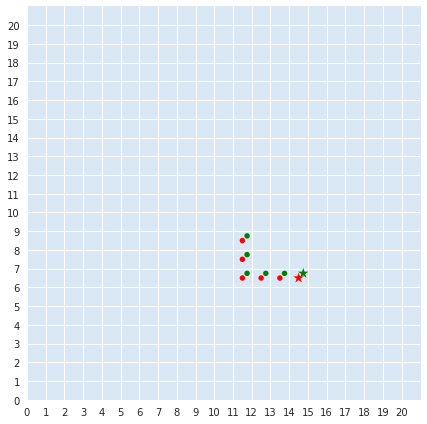

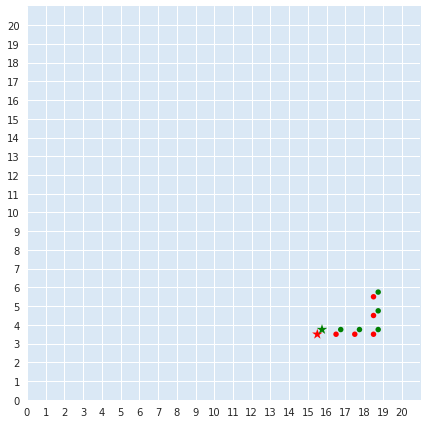

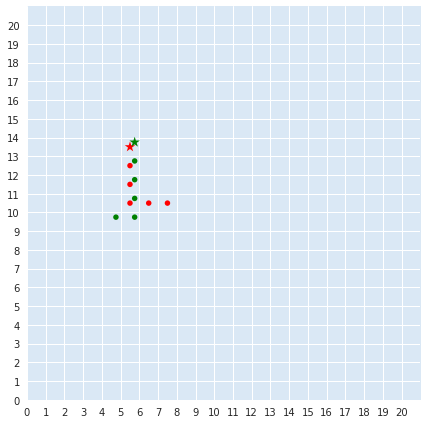

In [5]:
results_file = '../results/LR_trajs/short_run_annealed_2/gen_traj/results_cp_5000.pkl'

def plot_pickle_results(results_pkl_path, num_traj_to_plot=10):
    assert os.path.exists(results_pkl_path), \
        'results pickle does not exist {}'.format(results_pkl_path)
    with open(results_pkl_path, 'rb') as results_f:
        results_dict = pickle.load(results_f)

        total_traj = len(results_dict['true_traj_state'])
        for i in range(num_traj_to_plot):
            traj_idx = np.random.randint(total_traj)
            #traj_idx = i
            traj_len = results_dict['true_traj_state'][traj_idx].shape[0]
            true_traj, pred_traj = [], []
            if len(results_dict['pred_goal']) > 0:
                print("True goal: {}, Pred goal: {}".format(
                    np.argmax(results_dict['true_goal'][traj_idx]),
                    np.argmax(results_dict['pred_goal'][traj_idx])
                ))
                print("Pred goal softmax: {}".format(np.array_str(
                results_dict['pred_goal'][traj_idx], 
                precision=2,
                suppress_small=True)))
            else:
                print("True goal: {}".format(
                    np.argmax(results_dict['true_goal'][traj_idx])
                ))
                
            print("Pred latent variable:\n{}".format(
              np.array_str(softmax(results_dict['pred_context'][traj_idx].squeeze() / 1.66),
                           precision=2, suppress_small=True)))
                          
            for j in range(traj_len):
                x_true = results_dict['true_traj_state'][traj_idx][j, 0, :].tolist()
                x_pred = results_dict['pred_traj_state'][traj_idx][j, 0, :].tolist()
                true_traj.append(x_true)
                pred_traj.append(x_pred)
            '''
            print("True traj: {}, pred traj: {}".format(len(true_traj), len(pred_traj)))
            if x_true != x_pred:
                pdb.set_trace()
            '''
                
            # Plot trajectory
            plot_trajectory(np.array(true_traj),
                            21,
                            pred_traj_data=np.array(pred_traj),
                            color_map=sns.color_palette("Blues_r"),
                            figsize=(6, 6))


plot_pickle_results(results_file, num_traj_to_plot=30)

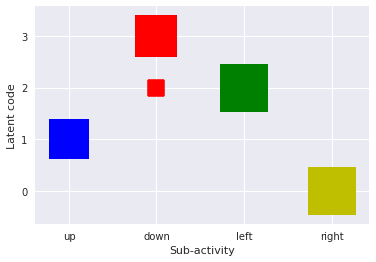

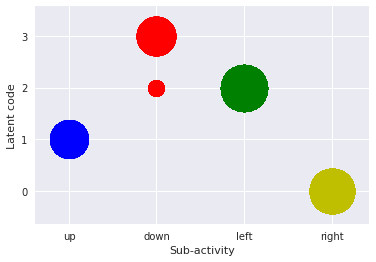

In [13]:
def map_direction(direction):
    if np.all(direction == np.array([0, 1])):
        return 0
    elif np.all(direction == np.array([0, -1])):
        return 1
    elif np.all(direction == np.array([1, 0])):
        return 2
    elif np.all(direction == np.array([-1, 0])):
        return 3


def plot_latent_variables(results_pkl_path, num_traj_to_plot=10):
    assert os.path.exists(results_pkl_path), \
        'results pickle does not exist {}'.format(results_pkl_path)
    with open(results_pkl_path, 'rb') as results_f:
        results_dict = pickle.load(results_f)
        total_traj = len(results_dict['true_traj_state'])
        x_coordinates = []
        y_coordinates = []
        marker_type = []
        
        for i in range(num_traj_to_plot):
            traj_idx = i
            traj_len = results_dict['true_traj_state'][traj_idx].shape[0]
            pred_context, pred_action = [], []
            #results_dict['pred_goal'][traj_idx]
            #results_dict['true_goal'][traj_idx]
            latent_var = softmax(results_dict['pred_context'][traj_idx].squeeze())
            
            for j in range(traj_len-1):
                diff = results_dict['pred_traj_state'][traj_idx][j+1][0] - \
                        results_dict['pred_traj_state'][traj_idx][j][0]
                x_coordinates.append(map_direction(diff))
                y_coordinates.append(np.argmax(latent_var[j,:]))
                if j < traj_len/2:
                    marker_type.append('s')
                else:
                    marker_type.append('o')
                
        scatter_dict = {}
        for x,y in zip(x_coordinates, y_coordinates):
            if (x, y) in scatter_dict:
                scatter_dict[(x, y)] += 1
            else:
                scatter_dict[(x, y)] = 1
                
        scatter_list = []
        for x,y in zip(x_coordinates, y_coordinates):
            scatter_list.append(scatter_dict[(x,y)]*5)
        
        #fig1, ax1 = plt.subplots()
        #ax1.scatter(x_coordinates, y_coordinates, s=scatter_list)
        
        color_dict = {0: 'b', 1: 'r', 2:'g', 3: 'y'}
        x_values = ['up', 'down', 'left', 'right']
        x_axis = np.arange(0, 4, 1)
        y_axis = np.arange(0, 4, 1)
        
        fig1, ax1 = plt.subplots()
        for x, y, m, s in zip(x_coordinates, y_coordinates, marker_type, scatter_list):
            if m == 's':
                ax1.scatter([x],[y], marker=m, s=s, c=color_dict[int(x)])
                
        plt.xticks(x_axis, x_values)
        plt.yticks(y_axis, y_axis)
        plt.xlabel('Sub-activity')
        plt.ylabel('Latent code')
            
        fig2, ax2 = plt.subplots()
        for x, y, m, s in zip(x_coordinates, y_coordinates, marker_type, scatter_list):
            if m == 'o':
                ax2.scatter([x],[y], marker=m, s=s, c=color_dict[int(x)])
                
        plt.xticks(x_axis, x_values)
        plt.yticks(y_axis, y_axis)
        plt.xlabel('Sub-activity')
        plt.ylabel('Latent code')
        
        plt.show()
                
                    
plot_latent_variables(results_file, num_traj_to_plot=300)